<a href="https://colab.research.google.com/github/hansuho113/Machine_learning/blob/main/FinalAssignment/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%88%98%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


In [ ]:
X_train = X_train.reshape(60000, 784).astype(np.float32)/255.0
X_test = X_test.reshape(10000, 784).astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


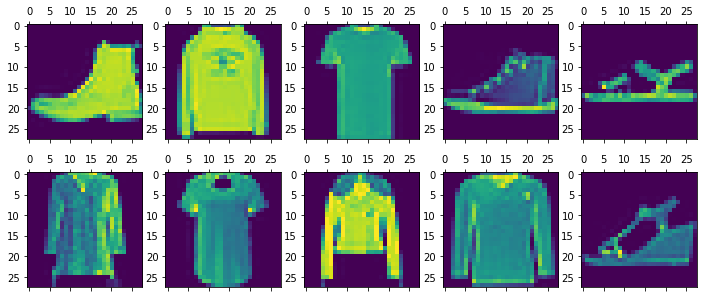

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick

figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))
tmp_list = []
for i in range(10):
    tmp = X_train[60000 - random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [ ]:
es = EarlyStopping(monitor='loss', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='loss', mode='min', save_best_only=True)

## 단순 MLP 모델

In [ ]:
n_input=784
h1=1024
h2=512
h3=512
h4=512
n_output=10

model = Sequential()
model.add(Dense(units=h1, activation='relu', input_shape=(n_input, )))
model.add(Dense(units=h2, activation='relu'))
model.add(Dense(units=h3, activation='relu'))
model.add(Dense(units=h4, activation='relu'))
model.add(Dense(units=n_output, activation='softmax'))


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
               batch_size=128, epochs=500,
               validation_data=(X_test, y_test),
               verbose=2, callbacks=[es, mc])

res = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {res[1]*100}")

Epoch 1/500
469/469 - 2s - loss: 0.0265 - accuracy: 0.8133 - val_loss: 0.0243 - val_accuracy: 0.8328
Epoch 2/500
469/469 - 2s - loss: 0.0199 - accuracy: 0.8623 - val_loss: 0.0213 - val_accuracy: 0.8505
Epoch 3/500
469/469 - 2s - loss: 0.0180 - accuracy: 0.8764 - val_loss: 0.0206 - val_accuracy: 0.8585
Epoch 4/500
469/469 - 2s - loss: 0.0168 - accuracy: 0.8839 - val_loss: 0.0188 - val_accuracy: 0.8693
Epoch 5/500
469/469 - 2s - loss: 0.0159 - accuracy: 0.8905 - val_loss: 0.0192 - val_accuracy: 0.8687
Epoch 6/500
469/469 - 2s - loss: 0.0153 - accuracy: 0.8946 - val_loss: 0.0193 - val_accuracy: 0.8688
Epoch 7/500
469/469 - 2s - loss: 0.0149 - accuracy: 0.8992 - val_loss: 0.0202 - val_accuracy: 0.8633
Epoch 8/500
469/469 - 2s - loss: 0.0143 - accuracy: 0.9010 - val_loss: 0.0171 - val_accuracy: 0.8825
Epoch 9/500
469/469 - 2s - loss: 0.0141 - accuracy: 0.9035 - val_loss: 0.0175 - val_accuracy: 0.8834
Epoch 10/500
469/469 - 2s - loss: 0.0133 - accuracy: 0.9094 - val_loss: 0.0167 - val_accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


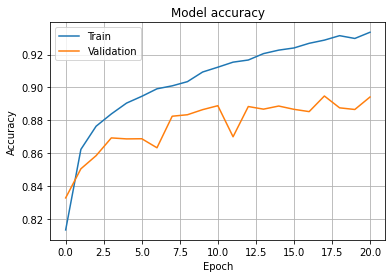

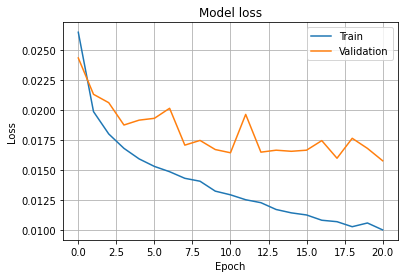

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper_left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


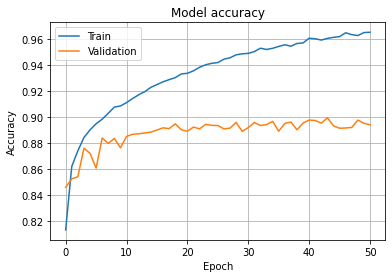

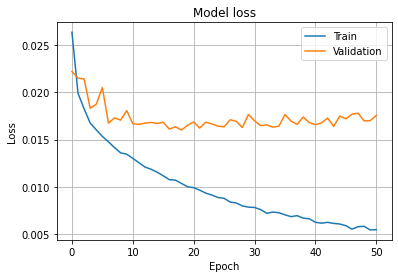

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper_left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

## Data Augmentaion 후 MLP 모델 적용

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

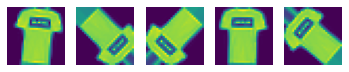

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=True,  
    samplewise_center=True, 
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=True, 
    vertical_flip=True)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(units=h1, activation='relu', input_shape=(n_input,)))
model.add(Dense(units=h2, activation='relu'))
model.add(Dense(units=h3, activation='relu'))
model.add(Dense(units=h4, activation='relu'))
model.add(Dense(units=n_output, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
image_size=28
batch_size=128

X_train = np.reshape(X_train, [-1, image_size, image_size, 1])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False)
datagen.fit(X_train)

In [ ]:
epochs=15
for e in range(epochs):
        print('Epoch', e)
        batches = 0
        for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
            x_batch = np.reshape(x_batch, [-1, image_size*image_size])
            model.fit(x_batch, y_batch, callbacks=[es, mc])
            batches += 1
            if batches >= len(X_train) / 32:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break

4/4 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.8125
Epoch 14
4/4 [==============================] - 0s 11ms/step - loss: 0.4424 - accuracy: 0.8047


In [ ]:
X_test = np.reshape(X_test, [-1, 784])
scores = model.evaluate(X_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print('Test loss:', scores[0])
print('Test accuracy: %0.1f%%' % (100 * scores[1]) )

Test loss: 1.4600774049758911
Test accuracy: 49.0%


In [ ]:
res = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {res[1]*100}")

Accuracy: 49.0200012922287


## CNN 모델

In [ ]:
import tensorflow as tf

In [ ]:
X_train = (X_train/255).astype('float32')
X_test = (X_test/255).astype('float32')
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
print(X_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [ ]:
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_initializer='glorot_normal',
                                     kernel_size=(3,3),
                                     input_shape=(28, 28, 1),
                                     activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3,3),
                                     activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3,3),
                                     activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(units=128,
                                    kernel_initializer='glorot_normal',
                                    activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.3))

cnn_model.add(tf.keras.layers.Dense(units=10,
                                     kernel_initializer='glorot_normal',
                                     activation='softmax'))

In [ ]:
learning_rate=0.001
batch_size=128
training_epochs=12

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=training_epochs)

Epoch 1/12
469/469 [==============================] - 13s 28ms/step - loss: 0.7353 - accuracy: 0.7273
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 0.4745 - accuracy: 0.8261
Epoch 3/12
469/469 [==============================] - 2s 5ms/step - loss: 0.4081 - accuracy: 0.8500
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 0.3733 - accuracy: 0.8637
Epoch 5/12
469/469 [==============================] - 2s 5ms/step - loss: 0.3443 - accuracy: 0.8724
Epoch 6/12
469/469 [==============================] - 2s 5ms/step - loss: 0.3208 - accuracy: 0.8832
Epoch 7/12
469/469 [==============================] - 2s 5ms/step - loss: 0.3004 - accuracy: 0.8903
Epoch 8/12
469/469 [==============================] - 2s 5ms/step - loss: 0.2807 - accuracy: 0.8964
Epoch 9/12
469/469 [==============================] - 2s 5ms/step - loss: 0.2640 - accuracy: 0.9035
Epoch 10/12
469/469 [==============================] - 2s 5ms/step - loss: 0.2498 - accuracy: 0.90

In [ ]:
import random
y_predicted = cnn_model.predict(X_test)

for x in range(0, 10):
    random_index = random.randint(0, X_test.shape[0]-1)
    print(f"""
    index: {random_index}
    actual y: {np.argmax(y_test[random_index])}
    predicted y: {np.argmax(y_predicted[random_index])}
    """ )


    index: 4328
    actual y: 4
    predicted y: 4
    

    index: 9566
    actual y: 3
    predicted y: 3
    

    index: 1409
    actual y: 7
    predicted y: 7
    

    index: 2005
    actual y: 8
    predicted y: 8
    

    index: 9573
    actual y: 6
    predicted y: 3
    

    index: 5195
    actual y: 9
    predicted y: 9
    

    index: 2131
    actual y: 2
    predicted y: 2
    

    index: 7658
    actual y: 9
    predicted y: 9
    

    index: 7798
    actual y: 5
    predicted y: 5
    

    index: 486
    actual y: 8
    predicted y: 8
    


In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)

print("loss: ", evaluation[0])
print("accuracy: ", evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3009 - accuracy: 0.8922
loss:  0.30086788535118103
accuracy:  0.8921999931335449
